In [4]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

### MK orthologs pairs

In [2]:
orthologs_from_human_ezh2 = {"U79": ["Gas5", "Gm50452"], "RPPH1": ["Rpph1"],
                             "SNORD58B": ["Gm23301"], "RNU4-2": ["Gm24265"],
                             "C19orf48": ["Gm26247", "Snord88a", "Gm23991"]}
orthologs_from_human_suz12 = {"RNF213-AS1": ["A930037H05Rik"], "RNU4-2": ["Gm24265"],
                              "SNORD5": ["Gm24299"]}
orthologs_from_guman_hnrnpk = {"RPPH1": ["Rpph1"], "DLEU2": ["Dleu2"], "SNORD58B": ["Gm23301"]}

orthologs = {"EZH2": orthologs_from_human_ezh2, "HNRNPK": orthologs_from_guman_hnrnpk,
             "SUZ12": orthologs_from_human_suz12}

## How is the difference in crds distributed?

In [36]:
def get_distances(ort_1, ort_2, protein, hum_dir):
    """
    ort_h, ort_m - rna names of orthologs,
    hum_dir - whether lifted from mouse to human (True) or vice versa (False)
    """
    
    if hum_dir:
        orig = pd.read_table(f"{protein}/human_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/human_lifted_from_mouse/{ort_2}.bed", names=clns)
    
    else:
        orig = pd.read_table(f"{protein}/mouse_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/mouse_lifted_from_human/{ort_2}.bed", names=clns)
    
    orig["middle"] = orig["start"] + (orig["end"] - orig["start"])
    lift["middle"] = lift["start"] + (lift["end"] - lift["start"])
    
    tmp_df = (orig
              .merge(lift, on="chr", suffixes=("_orig", "_lift"))
              .loc[:, ["chr", "middle_orig", "middle_lift"]]
             )
    tmp_df["distance"] = np.abs(tmp_df["middle_orig"] - tmp_df["middle_lift"])
    
    return tmp_df.distance.to_list()

In [45]:
clns = ["chr", "start", "end", "rna"]
orth_distances = []

for protein in orthologs:
    for ort_h, orts_m in orthologs[protein].items():
        for ort_m in orts_m:
            d1 = get_distances(ort_h, ort_m, protein, True)
            d2 = get_distances(ort_m, ort_h, protein, False)
            orth_distances.extend(d1)
            orth_distances.extend(d2)
#orth_distances = np.log10(np.array(orth_distances))
orth_distances = np.array(orth_distances)

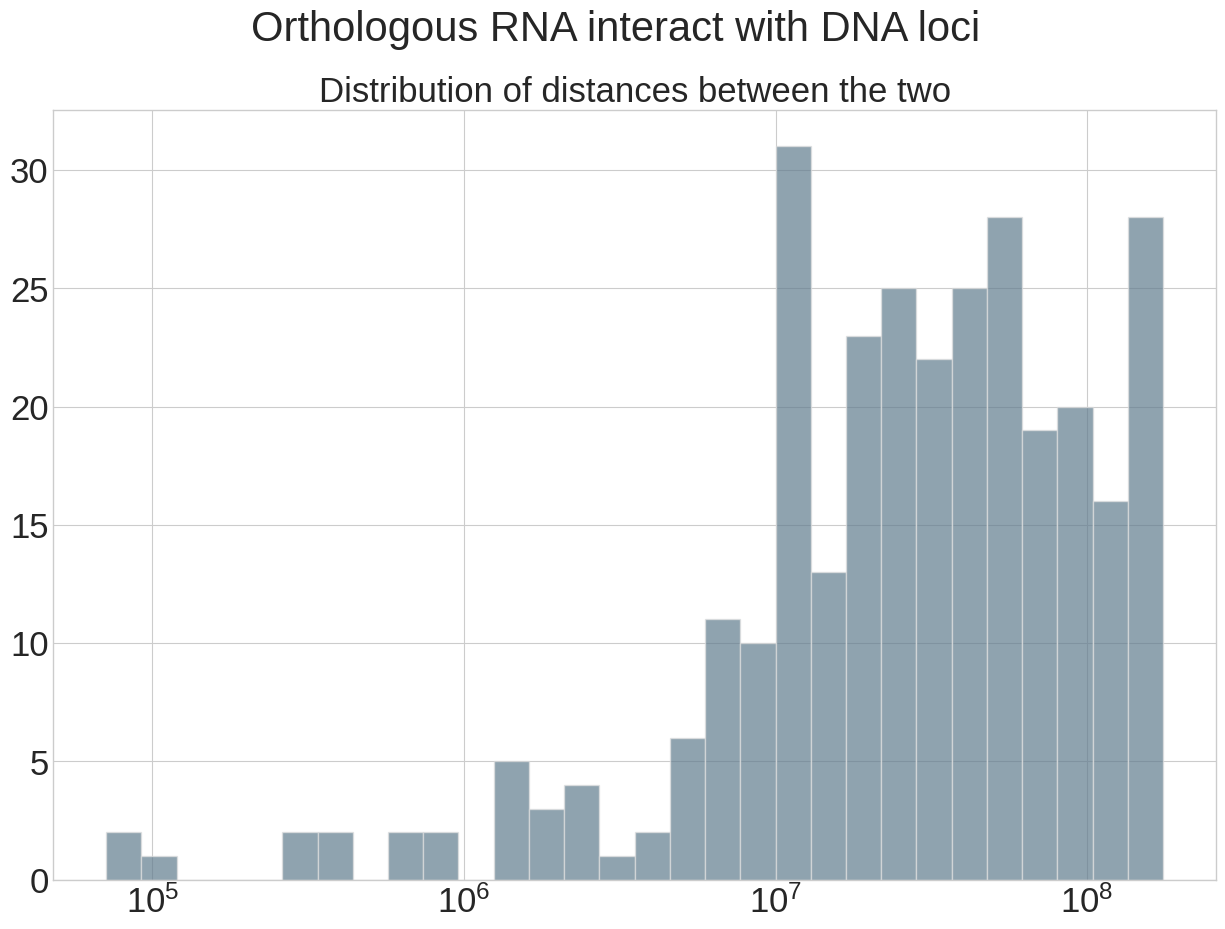

In [83]:
hist, bins, _ = plt.hist(orth_distances, bins=30)
plt.close()

plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-whitegrid')
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(orth_distances, bins=logbins, alpha=0.7, edgecolor="#e0e0e0", facecolor='#607c8e')
plt.xscale('log')
plt.suptitle("Orthologous RNA interact with DNA loci", fontsize=30)
plt.title("Distribution of distances between the two", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

## Select RNA-DNA contacts that are close

In [38]:
def get_distances(ort_1, ort_2, protein, hum_dir):
    """
    ort_h, ort_m - rna names of orthologs,
    hum_dir - whether lifted from mouse to human (True) or vice versa (False)
    """
    
    if hum_dir:
        orig = pd.read_table(f"{protein}/human_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/human_lifted_from_mouse/{ort_2}.bed", names=clns)
    
    else:
        orig = pd.read_table(f"{protein}/mouse_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/mouse_lifted_from_human/{ort_2}.bed", names=clns)
    
    orig["middle"] = orig["start"] + (orig["end"] - orig["start"])
    lift["middle"] = lift["start"] + (lift["end"] - lift["start"])
    
    tmp_df = (orig
              .merge(lift, on="chr", suffixes=("_orig", "_lift"))
#              .loc[:, ["chr", "middle_orig", "middle_lift", "rna_orig", "rna_lift"]]
             )
    tmp_df["distance"] = np.abs(tmp_df["middle_orig"] - tmp_df["middle_lift"])
    tmp_df["protein"] = protein
    
    return tmp_df

In [39]:
clns = ["chr", "start", "end", "rna"]
orth_distances = []

for protein in orthologs:
    for ort_h, orts_m in orthologs[protein].items():
        for ort_m in orts_m:
            d1 = get_distances(ort_h, ort_m, protein, True)
            d2 = get_distances(ort_m, ort_h, protein, False)
            orth_distances.append(d1)
            orth_distances.append(d2)
            break
#orthoconts = pd.concat(orth_distances).sort_values(by="distance")

## only closest

In [57]:
def get_distances(ort_1, ort_2, protein, hum_dir):
    """
    ort_h, ort_m - rna names of orthologs,
    hum_dir - whether lifted from mouse to human (True) or vice versa (False)
    """
    
    if hum_dir:
        orig = pd.read_table(f"{protein}/human_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/human_lifted_from_mouse/{ort_2}.bed", names=clns)
    
    else:
        orig = pd.read_table(f"{protein}/mouse_init/{ort_1}.bed", names=clns)
        lift = pd.read_table(f"{protein}/mouse_lifted_from_human/{ort_2}.bed", names=clns)
    
    orig["middle"] = orig["start"] + (orig["end"] - orig["start"])
    lift["middle"] = lift["start"] + (lift["end"] - lift["start"])
    
    tmp_df = (orig
              .merge(lift, on="chr", suffixes=("_orig", "_lift"))
#              .loc[:, ["chr", "middle_orig", "middle_lift", "rna_orig", "rna_lift"]]
             )
    tmp_df["distance"] = np.abs(tmp_df["middle_orig"] - tmp_df["middle_lift"])
    tmp_df["protein"] = protein
    
    mins = tmp_df.groupby(["chr", "start_orig", "end_orig"])["distance"].min().values
    
    return tmp_df[tmp_df.distance.isin(mins)]

In [58]:
clns = ["chr", "start", "end", "rna"]
orth_distances = []

for protein in orthologs:
    for ort_h, orts_m in orthologs[protein].items():
        for ort_m in orts_m:
            d1 = get_distances(ort_h, ort_m, protein, True)
            d2 = get_distances(ort_m, ort_h, protein, False)
            orth_distances.append(d1)
            orth_distances.append(d2)
            break
orthoconts = pd.concat(orth_distances).sort_values(by="distance")

In [63]:
orthoconts.distance

15        71101
7         79851
2        114378
14       267900
8        334071
        ...    
47    138184344
24    143092606
36    144811185
35    147778620
40    161325369
Name: distance, Length: 157, dtype: object

In [60]:
orthoconts.to_csv("orthological_rd_only_min.tsv", header=True, index=False, sep='\t')

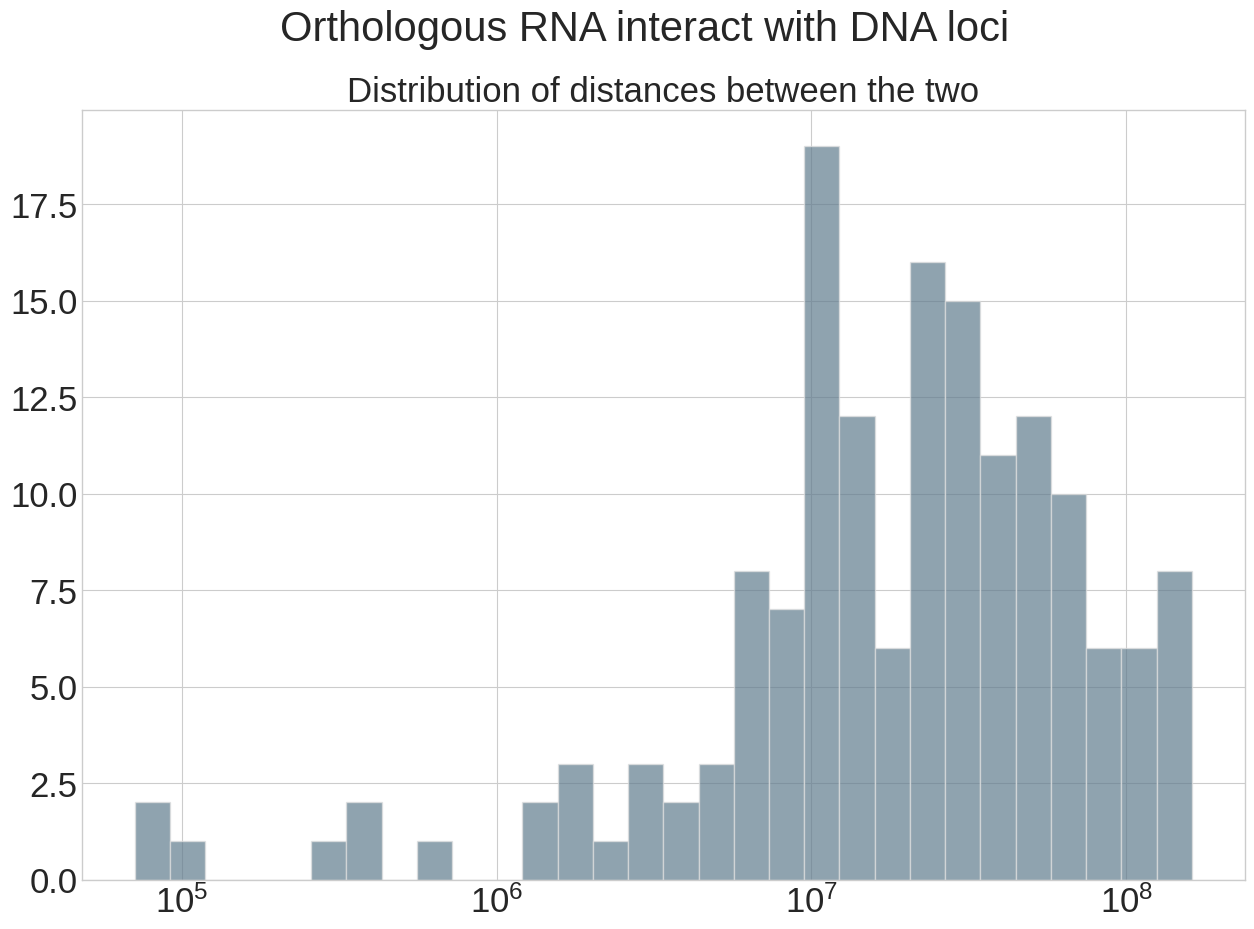

In [65]:
hist, bins, _ = plt.hist(orthoconts.distance, bins=30)
plt.close()

plt.figure(figsize=(15,10))
plt.style.use('seaborn-v0_8-whitegrid')
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.hist(orthoconts.distance, bins=logbins, alpha=0.7, edgecolor="#e0e0e0", facecolor='#607c8e')
plt.xscale('log')
plt.suptitle("Orthologous RNA interact with DNA loci", fontsize=30)
plt.title("Distribution of distances between the two", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

## save contacts

In [29]:
orthoconts.to_csv("orthological_rd.tsv", header=True, index=False, sep='\t')

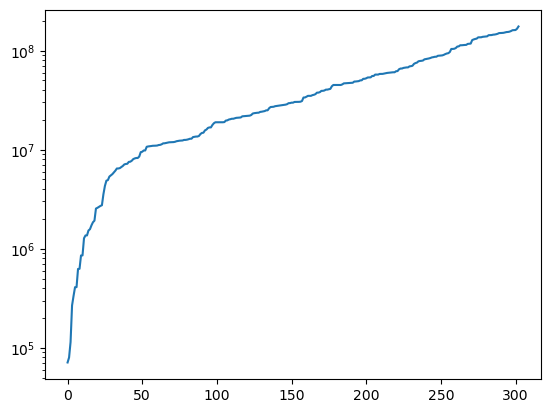

In [35]:
#logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.plot(range(orthoconts.distance.shape[0]), orthoconts.distance)
plt.yscale('log')

## IGV lookup

In [37]:
orthoconts

,chr,start_orig,end_orig,rna_orig,middle_orig,start_lift,end_lift,rna_lift,middle_lift,distance,protein
15,chr16,17561390,17561416,Gm24299,17561416,17490301,17490315,SNORD5,17490315,71101,SUZ12
7,chr22,20965936,20965959,SNORD5,20965959,21045781,21045810,Gm24299,21045810,79851,SUZ12
2,chr16,17222386,17222412,Gm24265,17222412,17336766,17336790,RNU4-2,17336790,114378,EZH2
14,chr16,17222389,17222415,Gm24299,17222415,17490301,17490315,SNORD5,17490315,267900,SUZ12
8,chr11,87461922,87461945,Rpph1,87461945,87127861,87127874,RPPH1,87127874,334071,HNRNPK
...,...,...,...,...,...,...,...,...,...,...,...
29,chr2,19446482,19446504,Rpph1,19446504,180065504,180065527,RPPH1,180065527,160619023,EZH2
28,chr2,19446482,19446504,Rpph1,19446504,180387509,180387534,RPPH1,180387534,160941030,EZH2
40,chr5,10588957,10588979,RPPH1,10588979,171914315,171914348,Rpph1,171914348,161325369,EZH2
7,chr6,4176789,4176813,U79,4176813,170293070,170293096,Gm50452,170293096,166116283,EZH2
